In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_train = pd.read_csv('titanictrain.csv')

In [3]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
new_order = ['Survived', 'Pclass','Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked','Name', 'PassengerId', 'Ticket', 'Cabin']

In [8]:
titanic_train = titanic_train[new_order]

In [9]:
titanic_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,PassengerId,Ticket,Cabin
0,0,3,male,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris",1,A/5 21171,NaN
1,1,1,female,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,PC 17599,C85
2,1,3,female,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina",3,STON/O2. 3101282,NaN
3,1,1,female,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,113803,C123
4,0,3,male,35.0,0,0,8.0500,S,"Allen, Mr. William Henry",5,373450,NaN


In [10]:
titanic_train.shape

(891, 12)

In [11]:
titanic_train.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Name             0
PassengerId      0
Ticket           0
Cabin          687
dtype: int64

In [12]:
titanic_train.Survived.value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [13]:
titanic_train.Pclass.value_counts(normalize=True)*100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

In [14]:
titanic_train.Sex.value_counts(normalize=True)*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In [15]:
titanic_train.Parch.value_counts(normalize=True)*100

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

In [16]:
titanic_train.Embarked.value_counts(normalize=True)*100

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

In [17]:
titanic_train.describe(include=['object'])

,Sex,Embarked,Name,Ticket,Cabin
count,891,889,891,891,204
unique,2,3,891,681,147
top,male,S,"Sagesser, Mlle. Emma",1601,B96 B98
freq,577,644,1,7,4


In [18]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,446.000000
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,257.353842
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,223.500000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,446.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,668.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,891.000000


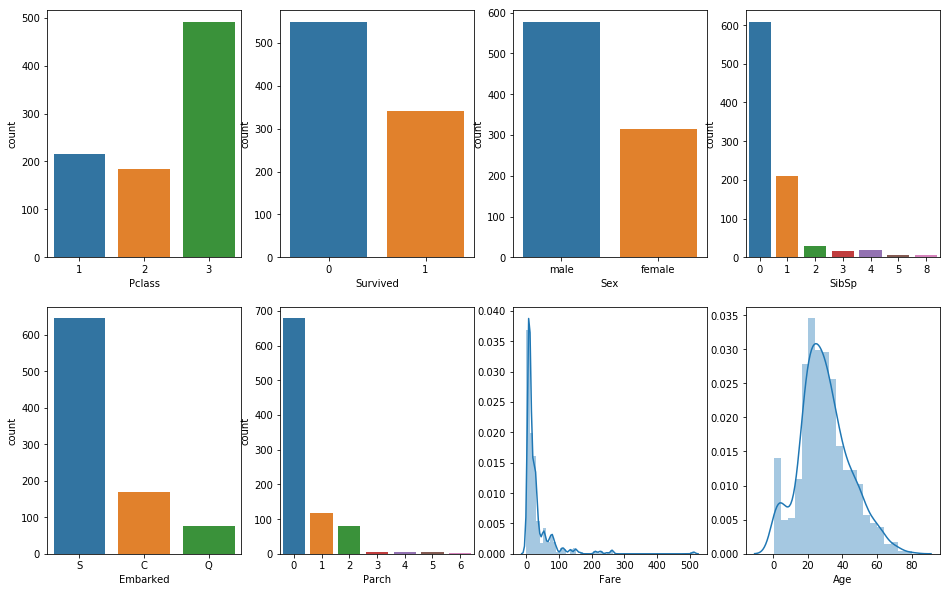

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10), sharex=False, sharey=False)

sns.countplot(x='Pclass', data=titanic_train, ax=axes[0,0])
sns.countplot(x='Survived', data=titanic_train, ax=axes[0,1])
sns.countplot(x='Sex', data=titanic_train, ax=axes[0,2])
sns.countplot(x='SibSp', data=titanic_train, ax=axes[0,3])
sns.countplot(x='Embarked', data=titanic_train, ax=axes[1,0])
sns.countplot(x='Parch', data=titanic_train, ax=axes[1,1])
sns.distplot(titanic_train['Fare'], ax= axes[1,2])
sns.distplot(titanic_train['Age'].dropna(), ax = axes [1,3]);

In [20]:
titanic_corr = titanic_train.corr()

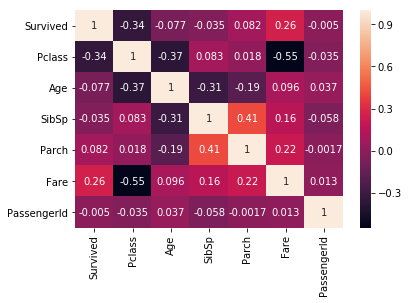

In [21]:
sns.heatmap(titanic_corr,annot = True)

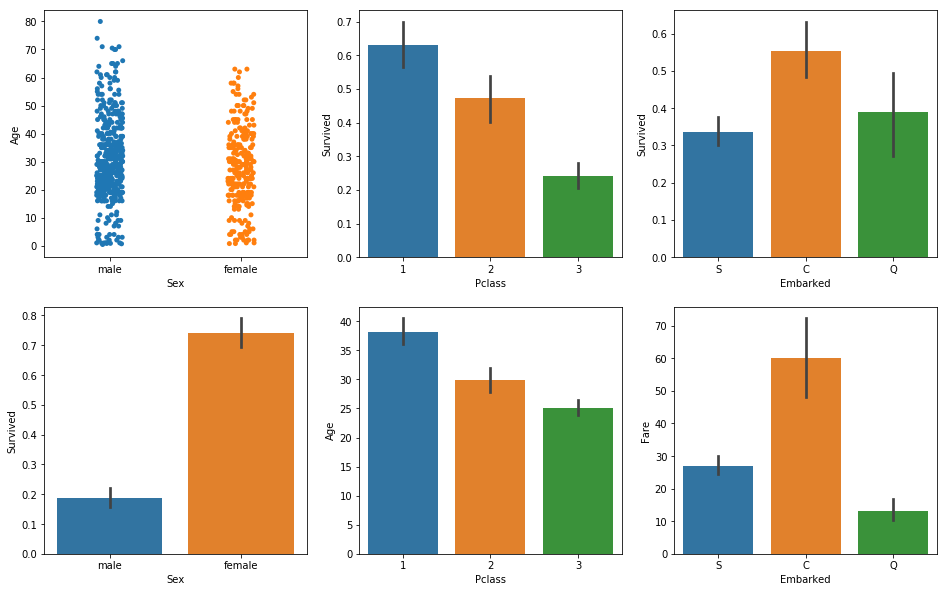

In [22]:
fig2, axes2 = plt.subplots(2, 3, figsize=(16, 10), sharex=False, sharey=False)

sns.stripplot(x="Sex", y="Age", data=titanic_train , jitter=True ,ax=axes2[0,0])
sns.barplot(x="Pclass", y="Survived", data=titanic_train, ax=axes2[0,1])
sns.barplot(x="Embarked", y="Survived", data=titanic_train, ax = axes2 [0,2])
sns.barplot(x="Pclass", y="Age", data=titanic_train, ax = axes2[1,1])
sns.barplot(x='Embarked', y='Fare', data=titanic_train, ax = axes2[1,2])
sns.barplot(x='Sex', y='Survived', data=titanic_train, ax = axes2[1,0]);